In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [229]:
df = pd.read_csv('../data/banks_data_1984.csv')
NI_df = pd.read_csv('../data/USNIM.csv')
ROA_df = pd.read_csv('../data/USROA.csv')
NP_df = pd.read_csv('../data/USNP.csv')
TAST_df = pd.read_csv('../data/USTAST.csv')

In [290]:
df.DATE = pd.to_datetime(df.DATE, infer_datetime_format=True)
df.set_index("DATE", inplace = True)

In [291]:
df.columns

Index(['US100NUM', 'US13NUM', 'US31NUM', 'US115NUM', 'USG15NUM', 'US100NIM',
       'US13NIM', 'US31NIM', 'US115NIM', 'USG15NIM', 'US100ROA', 'US13ROA',
       'US31ROA', 'US115ROA', 'USG15ROA', 'US100ROE', 'US13ROE', 'US31ROE',
       'US115ROE', 'USG15ROE', 'US100LLRTL', 'US13LLRTL', 'US31LLRTL',
       'US115LLRTL', 'USG15LLRTL', 'US100NPTL', 'US13NPTL', 'US31NPTL',
       'US115NPTL', 'USG15NPTL', 'USNIM', 'USROA', 'USNP', 'USTAST',
       'TinyBanksNum', 'SmallBanksNum', 'MidBanksNum', 'LargeBanksNum',
       'BanksNum'],
      dtype='object')

In [292]:
#For now, we choose not to consider super big banks with assets greater than $15B
df['TinyBanksNum'] = df.US100NUM /(df.US100NUM+df.US13NUM+df.US31NUM+df.US115NUM+df.USG15NUM)
df['SmallBanksNum'] = df.US13NUM / (df.US100NUM+df.US13NUM+df.US31NUM+df.US115NUM+df.USG15NUM)
df['MidBanksNum'] = df.US31NUM / (df.US100NUM+df.US13NUM+df.US31NUM+df.US115NUM+df.USG15NUM)
df['LargeBanksNum'] = df.US115NUM /(df.US100NUM+df.US13NUM+df.US31NUM+df.US115NUM+df.USG15NUM)
df['BanksNum'] = df.US100NUM+df.US13NUM+df.US31NUM+df.US115NUM+df.USG15NUM

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


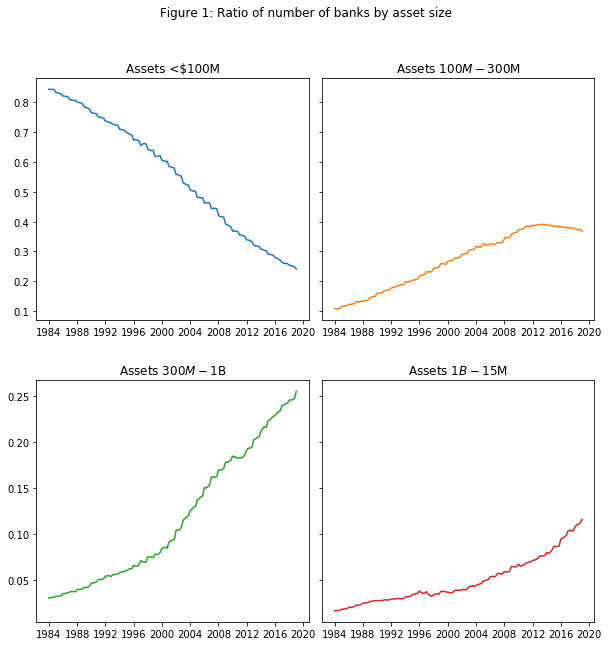

In [293]:
#TODO: fix y-axis into DateTime + consider changeng to 1 row (subplots(1,4))
fig, axs = plt.subplots(2, 2, figsize = (10,10), sharey='row', gridspec_kw={'hspace': 0.25, 'wspace': 0.05})
fig.suptitle('Figure 1: Ratio of number of banks by asset size')
axs[0, 0].plot(df.TinyBanksNum)
axs[0, 0].set_title('Assets <$100M')

axs[0, 1].plot(df.SmallBanksNum, 'tab:orange')
axs[0, 1].set_title('Assets $100M-$300M')
axs[1, 0].plot(df.MidBanksNum, 'tab:green')
axs[1, 0].set_title('Assets $300M-$1B')
axs[1, 1].plot(df.LargeBanksNum, 'tab:red')
axs[1, 1].set_title('Assets $1B-$15M')
plt.show()

In [294]:
#TODO: move this step to data set prep file
df = df.merge(NI_df, how = 'left')
df = df.merge(ROA_df, how = 'left')
df = df.merge(NP_df, how = 'left')
df = df.merge(TAST_df, how = 'left')
df.tail(8)


,US100NUM,US13NUM,US31NUM,US115NUM,USG15NUM,US100NIM,US13NIM,US31NIM,US115NIM,USG15NIM,...,USNIM,USROA,USNP,USTAST,TinyBanksNum,SmallBanksNum,MidBanksNum,LargeBanksNum,BanksNum,DATE
263,1218,1791,1182,529,86,3.88,3.93,3.91,3.89,3.18,...,3.30,1.34,93151960,16240091829,0.253433,0.372659,0.245943,0.110071,4806,2008-01-01
264,1218,1791,1182,529,86,3.88,3.93,3.91,3.89,3.18,...,3.30,1.34,93151960,16240091829,0.253433,0.372659,0.245943,0.110071,4806,2018-04-01
265,1190,1776,1169,525,86,3.91,3.97,3.94,3.91,3.20,...,3.33,1.36,89714404,16350523149,0.250737,0.374210,0.246313,0.110619,4746,2007-01-01
266,1190,1776,1169,525,86,3.91,3.97,3.94,3.91,3.20,...,3.33,1.36,89714404,16350523149,0.250737,0.374210,0.246313,0.110619,4746,2007-04-01
267,1190,1776,1169,525,86,3.91,3.97,3.94,3.91,3.20,...,3.33,1.36,89714404,16350523149,0.250737,0.374210,0.246313,0.110619,4746,2018-07-01
268,1165,1748,1161,526,87,3.94,3.99,3.98,3.92,3.23,...,3.35,1.35,88525345,16591224858,0.248560,0.372946,0.247706,0.112225,4687,2007-10-01
269,1165,1748,1161,526,87,3.94,3.99,3.98,3.92,3.23,...,3.35,1.35,88525345,16591224858,0.248560,0.372946,0.247706,0.112225,4687,2018-10-01
270,1121,1710,1189,540,92,3.91,3.95,3.92,3.90,3.25,...,3.36,1.35,88950973,16769527586,0.240972,0.367584,0.255589,0.116079,4652,2019-01-01


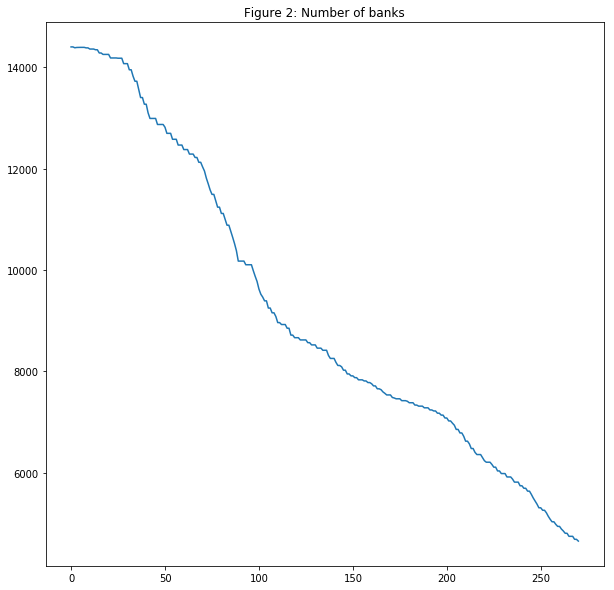

In [296]:
plt.figure(figsize = (10, 10))
plt.title ('Figure 2: Number of banks')
plt.plot(df.BanksNum)
plt.show()

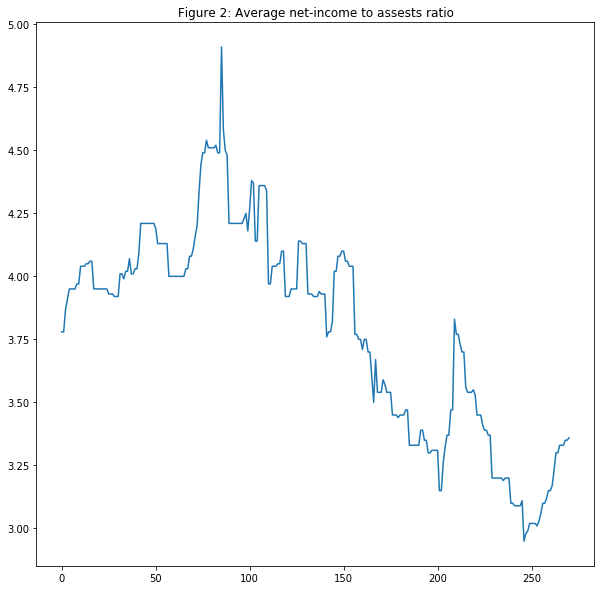

In [297]:
# Add major events to historical trend
plt.figure(figsize = (10, 10))
plt.title ('Figure 2: Average net-income to assests ratio')
plt.plot(df.USNIM)
plt.show()

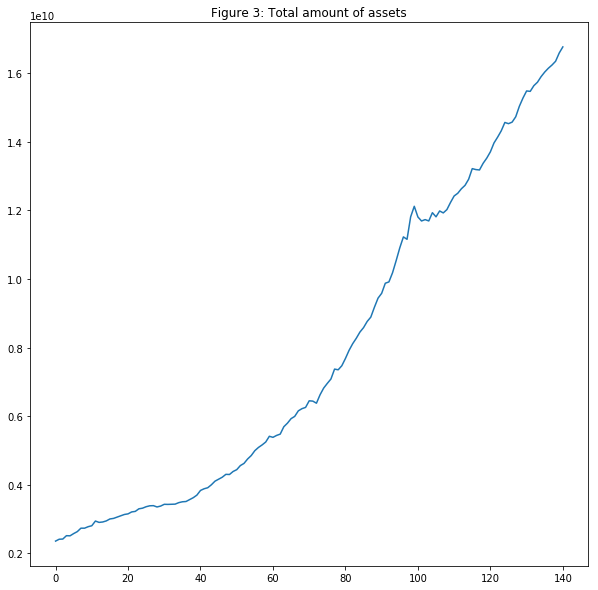

In [236]:

plt.figure(figsize = (10, 10))
plt.title ('Figure 3: Total amount of assets')
plt.plot(df.USTAST)
plt.show()

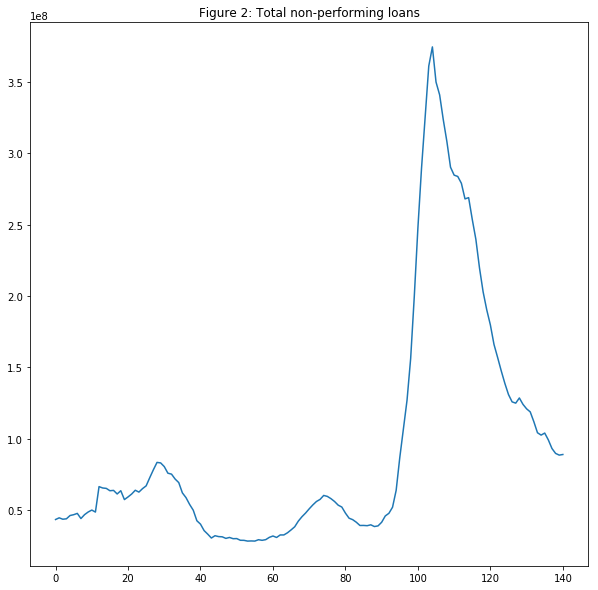

In [238]:
plt.figure(figsize = (10, 10))
plt.title ('Figure 2: Total non-performing loans')
plt.plot(df.USNP)
plt.show()

In [184]:
#Step 1: Consider regression NUM = b_0+b_1 * (NI)
mod = sm.OLS(df.BanksNum, sm.add_constant(df.USNIM))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     153.4
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           3.31e-24
Time:                        12:36:12   Log-Likelihood:                -1273.4
No. Observations:                 141   AIC:                             2551.
Df Residuals:                     139   BIC:                             2557.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9047.0984   1460.536     -6.194      0.0

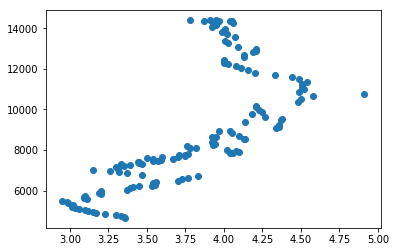

In [185]:
plt.scatter(x = df.USNIM, y = df.BanksNum)
plt.show()
'''Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual (characteristic #2). 
We hope to see a value close to zero which would indicate normalcy. The Prob (Omnibus) performs a 
statistical test indicating the probability that the residuals are normally distributed. 
We hope to see something close to 1 here. In this case Omnibus is relatively low and the Prob (Omnibus) 
is relatively high so the data is somewhat normal, but not altogether ideal. 
A linear regression approach would probably be better than random guessing but likely not as good as a 
nonlinear approach.

Skew – a measure of data symmetry. We want to see something close to zero, indicating the residual distribution 
is normal. Note that this value also drives the Omnibus. This result has a small, and therefore good, skew.

Kurtosis – a measure of "peakiness", or curvature of the data. Higher peaks lead to greater Kurtosis. 
Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better 
model with few outliers.

Durbin-Watson – tests for homoscedasticity (characteristic #3). We hope to have a value between 1 and 2. 
In this case, the data is close, but within limits.

Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see 
in this test a confirmation of the Omnibus test. In this case we do.

Condition Number – This test measures the sensitivity of a function's output as compared to its input 
(characteristic #4). When we have multicollinearity, we can expect much higher fluctuations to small 
changes in the data, hence, we hope to see a relatively small number, something below 30. 
In this case we are well below 30, which we would expect given our model only has two variables and one 
is a constant.'''

In [187]:
#Step 2: Run model for the first 24 qaurters - start of the period 
y_start = df.BanksNum.iloc[0:24]
x_start = df.USNIM.iloc[0:24]
mod = sm.OLS(y_start, sm.add_constant(x_start))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     39.45
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           2.54e-06
Time:                        12:48:33   Log-Likelihood:                -176.18
No. Observations:                  24   AIC:                             356.4
Df Residuals:                      22   BIC:                             358.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.291e+04   3048.333     10.795      0.0

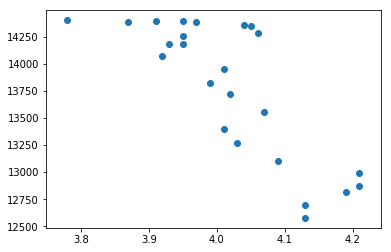

In [193]:
plt.scatter(y=y_start, x=x_start)

In [188]:
#Step 3: Run model for last 24 qaurters - end of the period
y_end = df.BanksNum.iloc[117:141]
x_end = df.USNIM.iloc[117:141]
mod = sm.OLS(y_end, sm.add_constant(x_end))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     5.591
Date:                Tue, 30 Jul 2019   Prob (F-statistic):             0.0273
Time:                        12:49:04   Log-Likelihood:                -174.48
No. Observations:                  24   AIC:                             353.0
Df Residuals:                      22   BIC:                             355.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9943.1402   1983.184      5.014      0.0

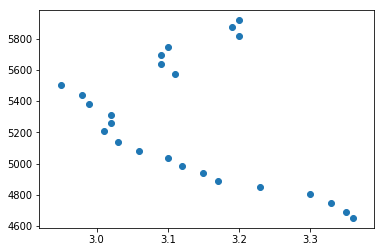

In [192]:
plt.scatter(x=x_end, y=y_end )

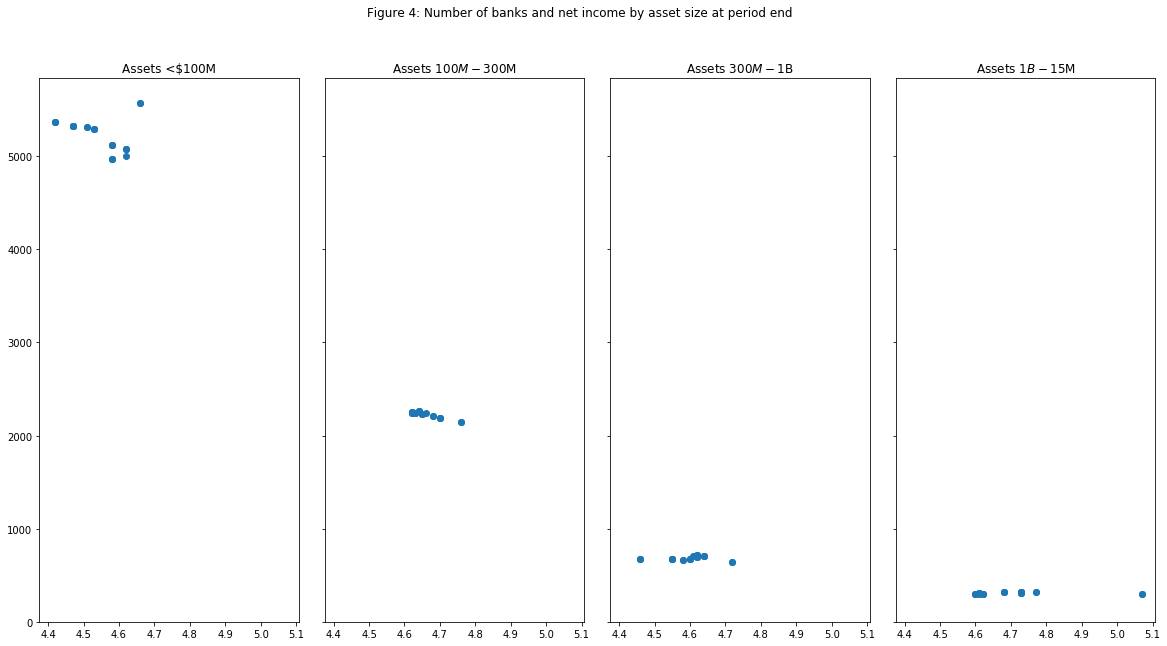

In [299]:


fig, axs = plt.subplots(1, 4, figsize = (20,10), sharey = 'row', sharex = 'row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
fig.suptitle('Figure 4: Number of banks and net income by asset size at period end')
(ax1, ax2, ax3, ax4) = axs
ax1.scatter(y = df.US100NUM.iloc[117:141], x = df.US100NIM.iloc[117:141])
ax1.set_title('Assets <$100M')
ax2.scatter(y = df.US13NUM.iloc[117:141], x = df.US13NIM.iloc[117:141])
ax2.set_title('Assets $100M-$300M')
ax3.scatter(y = df.US31NUM.iloc[117:141], x = df.US31NIM.iloc[117:141])
ax3.set_title('Assets $300M-$1B')
ax4.scatter(y = df.US115NUM.iloc[117:141], x = df.US115NIM.iloc[117:141])
ax4.set_title('Assets $1B-$15M')
plt.show()

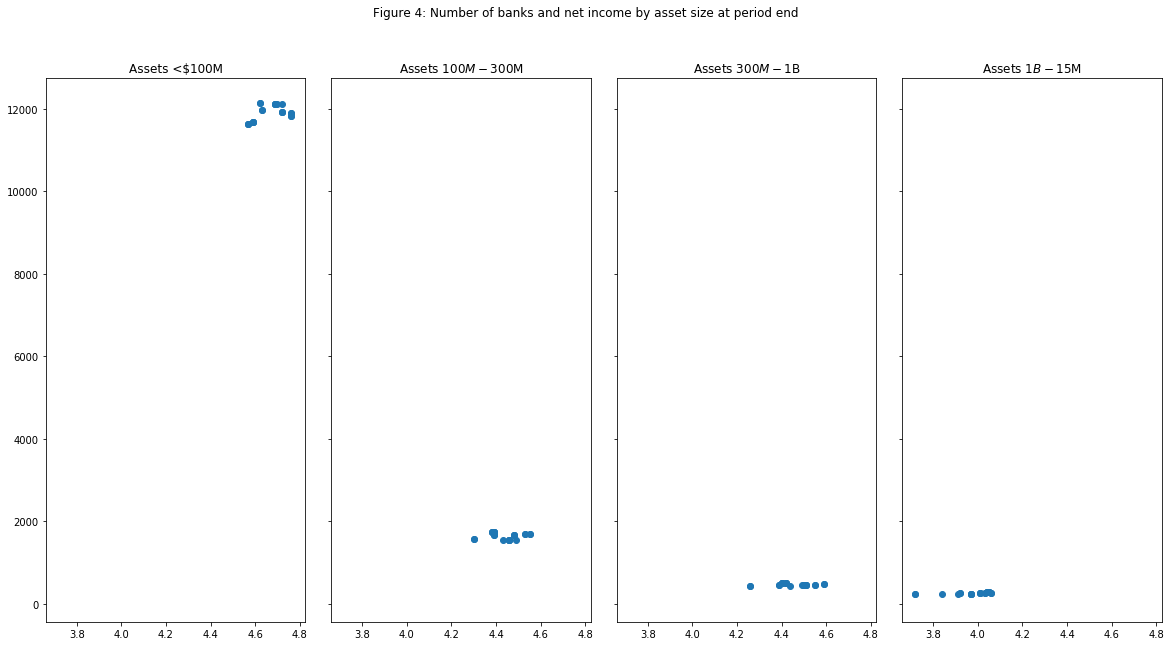

In [300]:
fig, axs = plt.subplots(1, 4, figsize = (20,10), sharey = 'row', sharex = 'row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
fig.suptitle('Figure 4: Number of banks and net income by asset size at period end')
(ax1, ax2, ax3, ax4) = axs
ax1.scatter(y = df.US100NUM.iloc[0:24], x = df.US100NIM.iloc[0:24])
ax1.set_title('Assets <$100M')
ax2.scatter(y = df.US13NUM.iloc[0:24], x = df.US13NIM.iloc[0:24])
ax2.set_title('Assets $100M-$300M')
ax3.scatter(y = df.US31NUM.iloc[0:24], x = df.US31NIM.iloc[0:24])
ax3.set_title('Assets $300M-$1B')
ax4.scatter(y = df.US115NUM.iloc[0:24], x = df.US115NIM.iloc[0:24])
ax4.set_title('Assets $1B-$15M')
plt.show()

In [282]:
#Regression of form NUM = b_0+b_1(USTATS)
#Step N: Run model for the first 24 qaurters - start of the period 
y_start = df.BanksNum.iloc[0:24]
x_start = df.USTAST.iloc[0:24]
mod = sm.OLS(y_start, sm.add_constant(x_start))
res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     126.3
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           1.39e-10
Time:                        14:05:06   Log-Likelihood:                -165.61
No. Observations:                  24   AIC:                             335.2
Df Residuals:                      22   BIC:                             337.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.97e+04    530.973     37.111      0.0

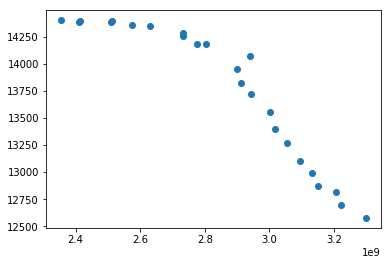

In [284]:
plt.scatter(y=y_start, x=x_start)
plt.show()



In [281]:
#Regression of form NUM = b_0+b_1(USTATS)
#Step N: Run model for the last 24 qaurters - end of the period 
y_end = df.BanksNum.iloc[117:141]
x_end = df.USTAST.iloc[117:141]
mod = sm.OLS(y_start, sm.add_constant(x_start))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3322.
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           1.68e-25
Time:                        14:04:44   Log-Likelihood:                -116.91
No. Observations:                  24   AIC:                             237.8
Df Residuals:                      22   BIC:                             240.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.083e+04     96.894    111.757      0.0

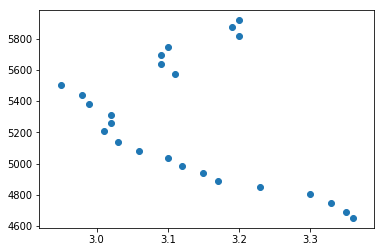

In [285]:
plt.scatter(y=y_end, x=x_end)
plt.show()


In [304]:
#Regression of form NUM = b_0+b_1(USTATS)+b_2(NP)
#Step N: Run model for the first 24 qaurters - start of the period 

y_start = df.BanksNum.iloc[0:24]
x_start = df[['USNP', 'USTAST']].iloc[0:24]
#X = df_adv[['TV', 'Radio']]
#x_start = df.USTAST.iloc[0:24]
mod = sm.OLS(y_start, sm.add_constant(x_start))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     54.01
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           5.27e-09
Time:                        14:46:56   Log-Likelihood:                -115.72
No. Observations:                  24   AIC:                             237.4
Df Residuals:                      21   BIC:                             241.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.574e+04    168.266     93.533      0.0

In [307]:
#Regression of form NUM = b_0+b_1(USTATS)+b_2(NP)
#Step N: Run model for the last 24 qaurters - end of the period 

y_start = df.BanksNum.iloc[117:141]
x_start = df[['USNP', 'USTAST']].iloc[117:141]
mod = sm.OLS(y_start, sm.add_constant(x_start))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     283.3
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           6.42e-16
Time:                        14:49:27   Log-Likelihood:                -112.87
No. Observations:                  24   AIC:                             231.7
Df Residuals:                      21   BIC:                             235.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.11e+04    208.138     53.325      0.0

In [318]:
#USe this for table
res.pvalues
#res.conf_int()
'''
US100NUM', 'US13NUM', 'US31NUM', 'US115NUM', 'USG15NUM', 'US100NIM',
       'US13NIM', 'US31NIM', 'US115NIM', 'USG15NIM', 'US100ROA', 'US13ROA',
       'US31ROA', 'US115ROA', 'USG15ROA', 'US100ROE', 'US13ROE', 'US31ROE',
       'US115ROE', 'USG15ROE', 'US100LLRTL', 'US13LLRTL', 'US31LLRTL',
       'US115LLRTL', 'USG15LLRTL', 'US100NPTL', 'US13NPTL', 'US31NPTL',
       'US115NPTL', 'USG15NPTL', 'USNIM', 'USROA', 'USNP', 'USTAST''''

const     6.627351e-24
USNP      5.465594e-02
USTAST    1.242208e-06
dtype: float64

In [320]:
y_start = df.US100NIM.iloc[117:141]
x_start = df[['US100ROA', 'US100ROE', 'US100LLRTL', 'US100NPTL']].iloc[117:141]
mod = sm.OLS(y_start, sm.add_constant(x_start))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               US100NIM   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     15.80
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           7.53e-06
Time:                        15:09:37   Log-Likelihood:                 46.261
No. Observations:                  24   AIC:                            -82.52
Df Residuals:                      19   BIC:                            -76.63
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4706      0.869      3.992      0.0

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [321]:
y_start = df.US100NIM.iloc[117:141]
x_start = df[['US100ROA', 'US100NPTL']].iloc[117:141]
mod = sm.OLS(y_start, sm.add_constant(x_start))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               US100NIM   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     29.30
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           8.38e-07
Time:                        15:10:59   Log-Likelihood:                 44.676
No. Observations:                  24   AIC:                            -83.35
Df Residuals:                      21   BIC:                            -79.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9619      0.238     16.675      0.0